In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('crime_dataset_india.csv')
df.head()

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00


In [3]:
df.drop('Date of Occurrence',axis=1,inplace=True)
df.drop('Time of Occurrence',axis=1,inplace=True)

In [4]:
df.isnull().sum()

Report Number            0
Date Reported            0
City                     0
Crime Code               0
Crime Description        0
Victim Age               0
Victim Gender            0
Weapon Used           5790
Crime Domain             0
Police Deployed          0
Case Closed              0
Date Case Closed     20098
dtype: int64

## year wise count of crime reports

In [5]:
df['Reposted_year']=df['Date Reported'].str.split('-').str[2].str.split(" ").str[0]

In [6]:
df.shape

(40160, 13)

In [7]:
df['Reposted_year'].value_counts()

Reposted_year
2021    8766
2023    8761
2022    8759
2020    8747
2024    5127
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Reposted_year'>

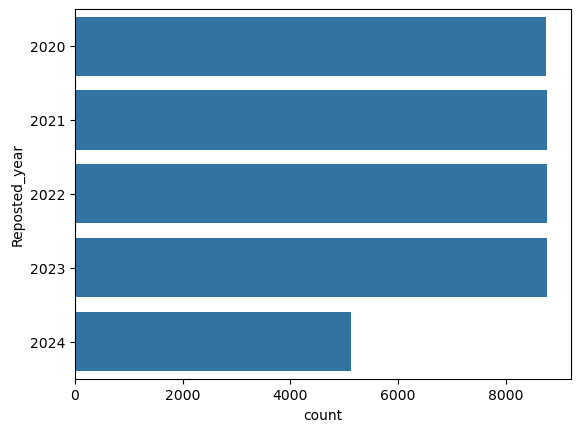

In [8]:
sns.countplot(data=df['Reposted_year'])

observations:
1. in year 2020,2021,2022,2023 more 8000 crime report files
2. in 2024 till august more 4000 crime report files

In [9]:
df.head(
    
)

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year
0,1,02-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020
1,2,01-01-2020 19:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020
2,3,02-01-2020 05:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020
3,4,01-01-2020 05:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020
4,5,01-01-2020 21:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020


In [10]:
df['reported_momths']=df['Date Reported'].str.split('-').str[1]

<Axes: xlabel='count', ylabel='reported_momths'>

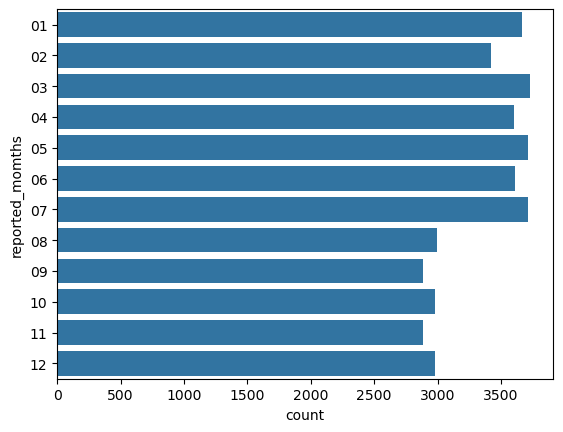

In [11]:
sns.countplot(data=df['reported_momths'])

observations:
1. accross years 2020-2024 crime rate or crime report between months 01-07(jan-july) are more than 3000 
2. between 08-012 (aug-dec) crime rate or report around 3000 

In [12]:
df.head()

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year,reported_momths
0,1,02-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,01
1,2,01-01-2020 19:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,01
2,3,02-01-2020 05:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,01
3,4,01-01-2020 05:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,01
4,5,01-01-2020 21:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,01


## top-5 crime happing city

In [13]:
gg=df['City'].value_counts().index
gf=df['City'].value_counts().values


([<matplotlib.patches.Wedge at 0x1de81faf0d0>,
 [Text(0.6818077334485192, 0.8632138869421607, 'Delhi'),
  Text(-0.908275550618511, 0.6205123078139878, 'Mumbai'),
  Text(-0.8138996344083999, -0.7399779625839362, 'Bangalore'),
  Text(0.2699684811992072, -1.066356891082434, 'Hyderabad'),
  Text(1.0040710200147884, -0.44926761152620653, 'Kolkata')],
 [Text(0.37189512733555585, 0.4708439383320876, '28.72%'),
  Text(-0.4954230276100968, 0.3384612588076297, '23.48%'),
  Text(-0.4439452551318544, -0.40362434322760155, '19.08%'),
  Text(0.14725553519956755, -0.5816492133176911, '15.32%'),
  Text(0.5476751018262482, -0.24505506083247627, '13.39%')])

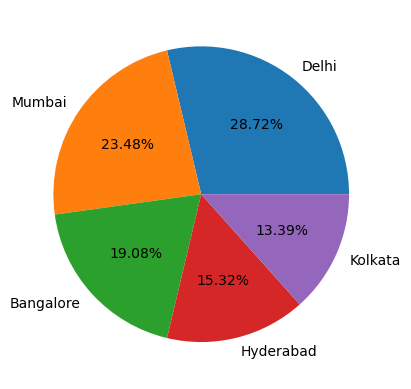

In [14]:
plt.pie(x=gf[:5],labels=gg[:5],autopct='%1.2F%%')

observations:
1. delhi rank 1 with 28.72% of crime reported acrosss 20-24
2. mumbai rank 2
3. bangalore rank 3
4. hyderabad rank 4
5. kolkata rank 5


## top -5 city with less crime rate

<Axes: xlabel='City'>

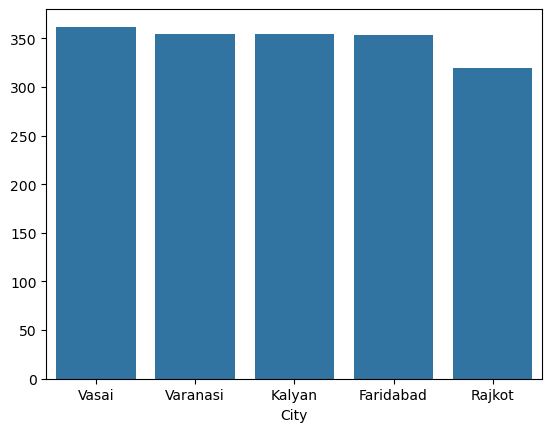

In [15]:
sns.barplot(x=gg[-5:],y=gf[-5:])

In [16]:
df.head()

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year,reported_momths
0,1,02-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,01
1,2,01-01-2020 19:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,01
2,3,02-01-2020 05:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,01
3,4,01-01-2020 05:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,01
4,5,01-01-2020 21:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,01


## Crime Description vs count 


([<matplotlib.patches.Wedge at 0x1de81f1f0d0>,
 [Text(1.0868314787974604, 0.16969778046552494, 'BURGLARY'),
  Text(0.9835602366495504, 0.4925538152140134, 'VANDALISM'),
  Text(0.7877920141563043, 0.7677133204729181, 'FRAUD'),
  Text(0.5210390166499359, 0.9687715639553361, 'DOMESTIC VIOLENCE'),
  Text(0.2091108612377457, 1.0799410389981523, 'FIREARM OFFENSE'),
  Text(-0.12142615713242534, 1.0932774983342755, 'ROBBERY'),
  Text(-0.44011406578699386, 1.0081168628172241, 'KIDNAPPING'),
  Text(-0.7185715688864182, 0.8328594721728941, 'IDENTITY THEFT'),
  Text(-0.9326045535008233, 0.5833084490983569, 'SEXUAL ASSAULT'),
  Text(-1.0632645204657583, 0.28190168413601513, 'ASSAULT'),
  Text(-1.0991005090397967, -0.044475510435069344, 'TRAFFIC VIOLATION'),
  Text(-1.0370969953158204, -0.3666467268460165, 'PUBLIC INTOXICATION'),
  Text(-0.8831436935603112, -0.6557874781700633, 'HOMICIDE'),
  Text(-0.6517738049827464, -0.8861099859150178, 'CYBERCRIME'),
  Text(-0.3641306876909919, -1.037983064544737

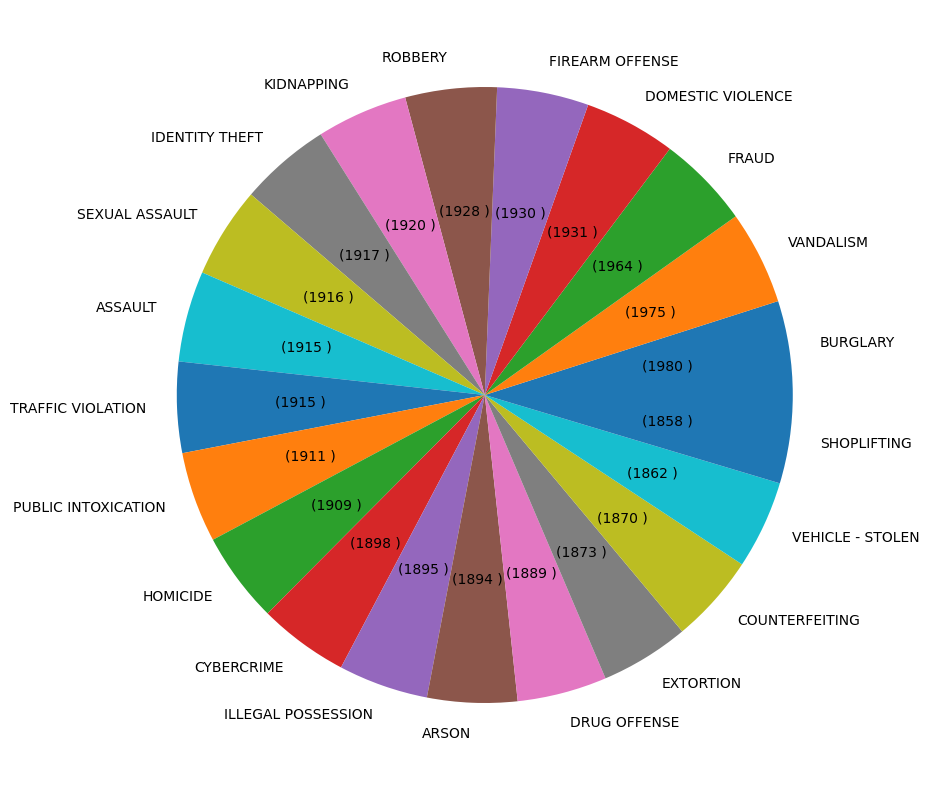

In [17]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(25,10)
plt.pie(x=df['Crime Description'].value_counts().values,labels=df['Crime Description'].value_counts().index,autopct=lambda pct: f"({int(pct/100.*sum(gf))} )")

In [18]:
df.head()

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year,reported_momths
0,1,02-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,01
1,2,01-01-2020 19:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,01
2,3,02-01-2020 05:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,01
3,4,01-01-2020 05:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,01
4,5,01-01-2020 21:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,01


## crime rate vs age

In [19]:
greater_18=len(df[df['Victim Age']>18])
greater_18

less_18=len(df)-greater_18
less_18


5121

([<matplotlib.patches.Wedge at 0x1de81ea7250>,
 [Text(-1.0129098707167978, 0.42896805685794354, 'age>18'),
  Text(1.0129098506353529, -0.42896810427567594, 'age<18')],
 [Text(-0.5524962931182533, 0.23398257646796916, '87.25%\n(35038 units)'),
  Text(0.5524962821647379, -0.23398260233218685, '12.75%\n(5121 units)')])

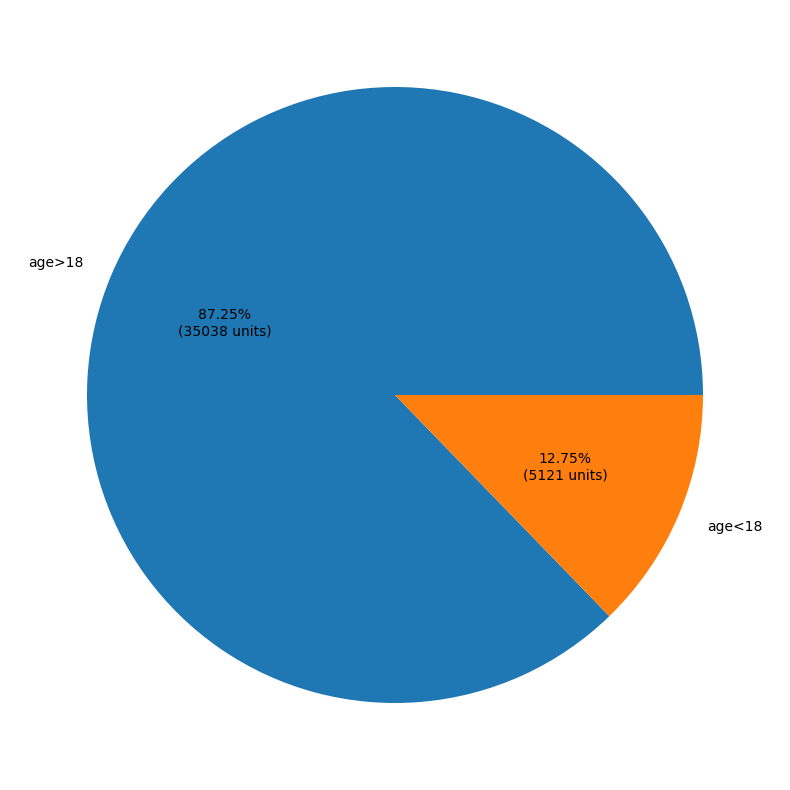

In [20]:
plt.pie(x=[greater_18,less_18],autopct=lambda pct: f"{pct:.2f}%\n({int(pct/100.*sum(gf))} units)",labels=['age>18','age<18'])

observations:
1. more than 87.25% crime happen between age >18
2. 12.75% crime happen between age<18

In [21]:
df.head()

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year,reported_momths
0,1,02-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,01
1,2,01-01-2020 19:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,01
2,3,02-01-2020 05:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,01
3,4,01-01-2020 05:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,01
4,5,01-01-2020 21:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,01


## crime rate vs gender

([<matplotlib.patches.Wedge at 0x1de81f14bd0>,
 [Text(-0.20048724310790142, 1.0815751778545, 'F'),
  Text(-0.17046293455440162, -1.0867117317592103, 'M'),
  Text(1.0374407188664954, -0.3656730162833586, 'X')],
 [Text(-0.10935667805885531, 0.5899500970115454, '55.83%\n(22422 units)'),
  Text(-0.09297978248421906, -0.5927518536868419, '33.38%\n(13405 units)'),
  Text(0.5658767557453611, -0.19945800888183193, '10.79%\n(4331 units)')])

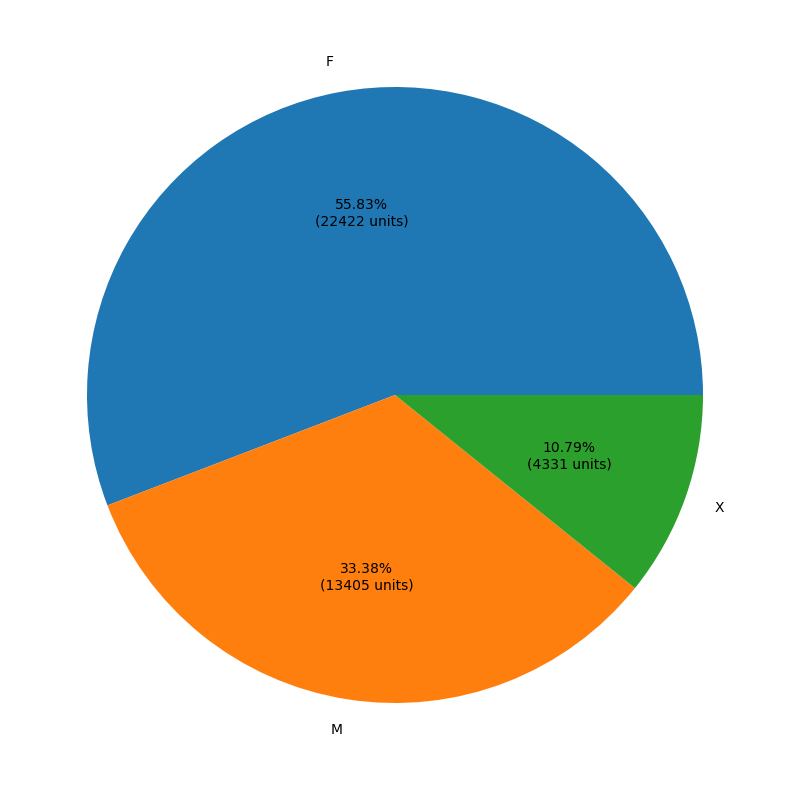

In [22]:
plt.pie(x=df['Victim Gender'].value_counts().values,labels=df['Victim Gender'].value_counts().index,autopct=lambda pct: f"{pct:.2f}%\n({int(pct/100.*sum(gf))} units)")

observations:
1. out of total crime registerd 55.83% victims are female
2. 33.38% victims are male 
3. 10.79% victime are others

In [23]:
df.head()

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year,reported_momths
0,1,02-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,01
1,2,01-01-2020 19:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,01
2,3,02-01-2020 05:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,01
3,4,01-01-2020 05:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,01
4,5,01-01-2020 21:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,01


## Crime Domain %

In [24]:
df['Crime Domain'].unique()

array(['Violent Crime', 'Other Crime', 'Fire Accident',
       'Traffic Fatality'], dtype=object)

In [25]:
df['Crime Domain'].value_counts()

Crime Domain
Other Crime         22948
Violent Crime       11472
Fire Accident        3825
Traffic Fatality     1915
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1de81e2cbd0>,
 [Text(-0.24472511849475098, 1.0724316371581595, 'Other Crime'),
  Text(-0.24506057063449366, -1.0723550329626361, 'Violent Crime'),
  Text(0.9085971672324992, -0.6200412790267098, 'Fire Accident'),
  Text(1.0876803079371347, -0.16416926547249963, 'Traffic Fatality')],
 [Text(-0.13348642826986415, 0.5849627111771779, '57.14%\n(22948 units)'),
  Text(-0.13366940216426926, -0.5849209270705288, '28.57%\n(11472 units)'),
  Text(0.4955984548540904, -0.33820433401456895, '9.52%\n(3824 units)'),
  Text(0.5932801679657097, -0.08954687207590889, '4.77%\n(1915 units)')])

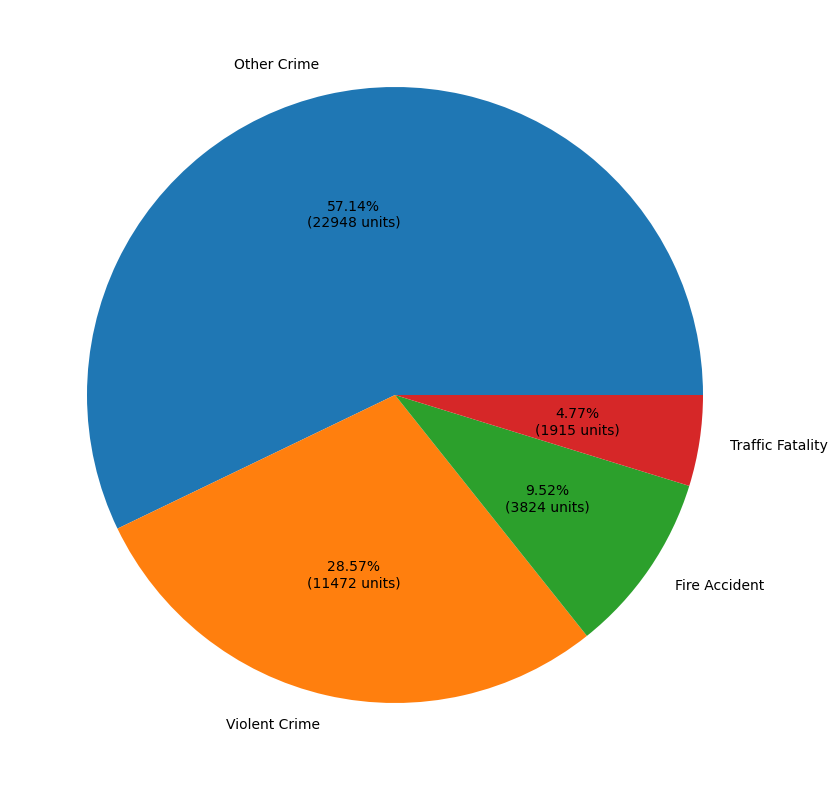

In [26]:
plt.pie(x=df['Crime Domain'].value_counts().values,labels=df['Crime Domain'].value_counts().index,autopct=lambda pct: f"{pct:.2f}%\n({int(pct/100.*sum(gf))} units)")

observations :
1. out of total crime registered 28.57% are voilent crime
2. 9.52% are Fire Accident
3. 4.77% are Traffic Fatality
4. 57.14 % are other criminal activity


In [27]:
df.head()

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year,reported_momths
0,1,02-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,01
1,2,01-01-2020 19:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,01
2,3,02-01-2020 05:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,01
3,4,01-01-2020 05:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,01
4,5,01-01-2020 21:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,01


In [28]:
df['Weapon Used'].unique()

array(['Blunt Object', 'Poison', 'Firearm', 'Other', 'Knife',
       'Explosives', nan], dtype=object)

In [29]:
df['Weapon Used'].isnull().sum()

5790

In [30]:
df['Weapon Used'].mode()

0    Knife
Name: Weapon Used, dtype: object

In [31]:
df['Weapon Used']=df['Weapon Used'].fillna(value='Knife')

In [32]:
df['Weapon Used'].unique()

array(['Blunt Object', 'Poison', 'Firearm', 'Other', 'Knife',
       'Explosives'], dtype=object)

([<matplotlib.patches.Wedge at 0x1de81dc9310>,
 [Text(0.6756518681821299, 0.8680406401903069, 'Knife'),
  Text(-0.7068392515954779, 0.8428394108037098, 'Explosives'),
  Text(-1.0996357154410201, -0.02830712501325878, 'Blunt Object'),
  Text(-0.6641173734618878, -0.8768968663794413, 'Poison'),
  Text(0.2656502184466786, -1.0674408468103664, 'Other'),
  Text(0.9945537273638615, -0.4699605125823339, 'Firearm')],
 [Text(0.3685373826447981, 0.47347671283107645, '28.95%\n(11624 units)'),
  Text(-0.38554868268844245, 0.4597305877111144, '14.32%\n(5750 units)'),
  Text(-0.5998012993314654, -0.01544025000723206, '14.29%\n(5737 units)'),
  Text(-0.36224584007012056, -0.4783073816615134, '14.26%\n(5728 units)'),
  Text(0.14490011915273376, -0.5822404618965634, '14.13%\n(5676 units)'),
  Text(0.5424838512893789, -0.2563420977721821, '14.05%\n(5642 units)')])

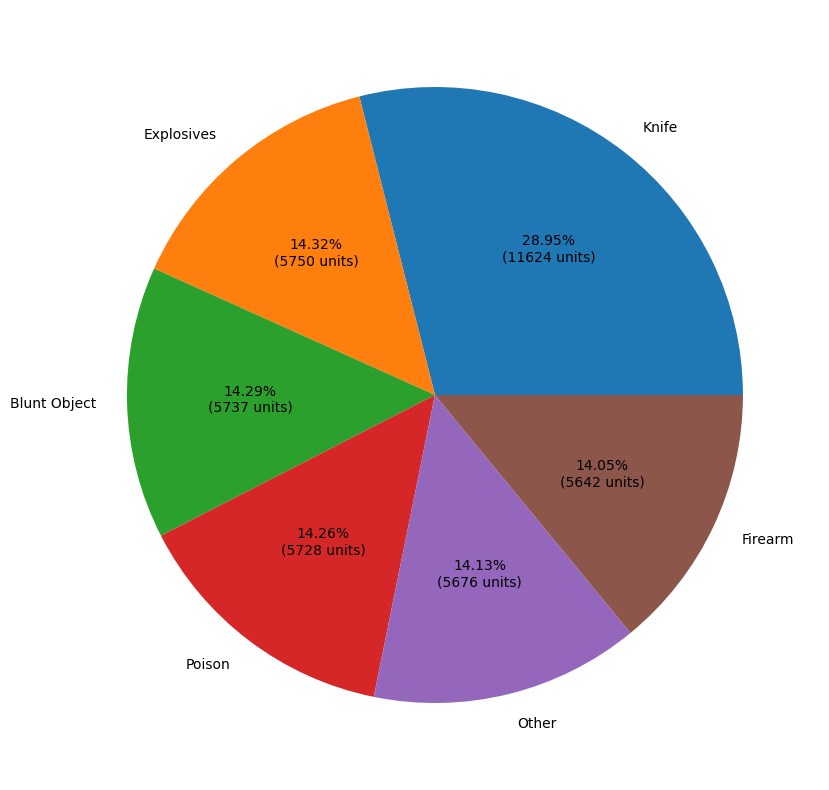

In [33]:
plt.pie(x=df['Weapon Used'].value_counts().values,labels=df['Weapon Used'].value_counts().index,autopct=lambda pct: f"{pct:.2f}%\n({int(pct/100.*sum(gf))} units)")

obervations:
1. more than 10000 crime take place with the help of knife


In [34]:
df.head()

,Report Number,Date Reported,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year,reported_momths
0,1,02-01-2020 00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,01
1,2,01-01-2020 19:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,01
2,3,02-01-2020 05:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,01
3,4,01-01-2020 05:00,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,01
4,5,01-01-2020 21:00,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,01


## case open vs close

In [35]:
df['Case Closed'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
df['Case Closed'].value_counts()

Case Closed
No     20098
Yes    20062
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1de8241e010>,
 [Text(-0.0015489605571175214, 1.0999989094181832, 'Close'),
  Text(0.0015490635464477432, -1.0999989092731544, 'Open')],
 [Text(-0.0008448875766095571, 0.5999994051371909, '50.04%\n(20098 units)'),
  Text(0.00084494375260786, -0.5999994050580841, '49.96%\n(20062 units)')])

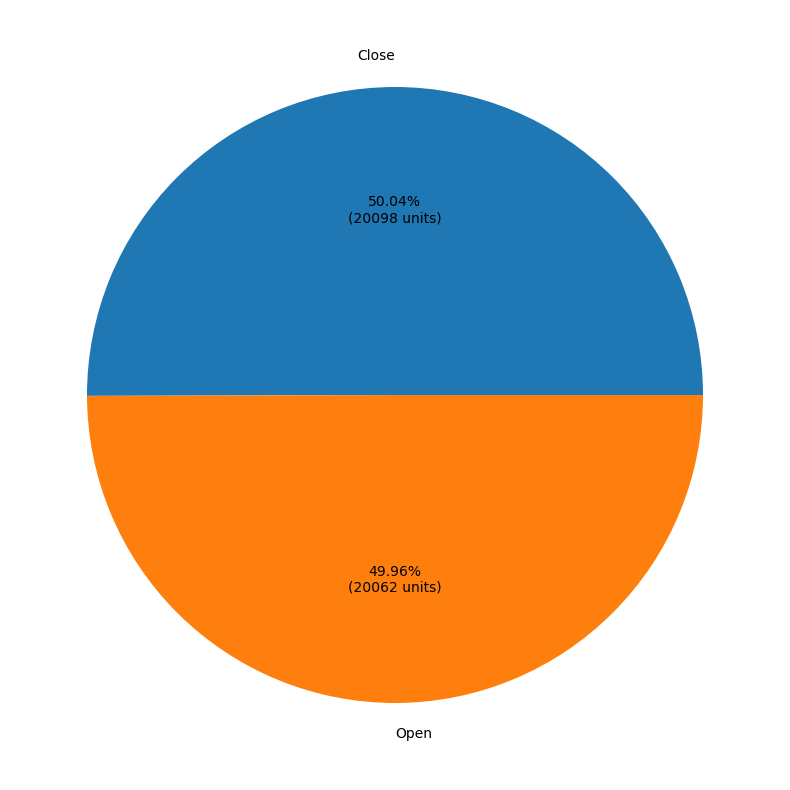

In [37]:
plt.pie(x=df['Case Closed'].value_counts().values,labels=['Close','Open'],autopct=lambda pct: f"{pct:.2f}%\n({int(pct/100.*sum(gf))} units)")

## preparing data

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Report Number      40160 non-null  int64 
 1   Date Reported      40160 non-null  object
 2   City               40160 non-null  object
 3   Crime Code         40160 non-null  int64 
 4   Crime Description  40160 non-null  object
 5   Victim Age         40160 non-null  int64 
 6   Victim Gender      40160 non-null  object
 7   Weapon Used        40160 non-null  object
 8   Crime Domain       40160 non-null  object
 9   Police Deployed    40160 non-null  int64 
 10  Case Closed        40160 non-null  object
 11  Date Case Closed   20062 non-null  object
 12  Reposted_year      40160 non-null  object
 13  reported_momths    40160 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


In [39]:
df['reported_day']=df['Date Reported'].str.split('-').str[0].astype(int)

In [40]:
df.drop('Date Reported',axis=1,inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Report Number      40160 non-null  int64 
 1   City               40160 non-null  object
 2   Crime Code         40160 non-null  int64 
 3   Crime Description  40160 non-null  object
 4   Victim Age         40160 non-null  int64 
 5   Victim Gender      40160 non-null  object
 6   Weapon Used        40160 non-null  object
 7   Crime Domain       40160 non-null  object
 8   Police Deployed    40160 non-null  int64 
 9   Case Closed        40160 non-null  object
 10  Date Case Closed   20062 non-null  object
 11  Reposted_year      40160 non-null  object
 12  reported_momths    40160 non-null  object
 13  reported_day       40160 non-null  int32 
dtypes: int32(1), int64(4), object(9)
memory usage: 4.1+ MB


In [42]:
df.head()

,Report Number,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Reposted_year,reported_momths,reported_day
0,1,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,2020,01,2
1,2,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,2020,01,1
2,3,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,2020,01,2
3,4,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00,2020,01,1
4,5,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00,2020,01,1


In [43]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['City']=le.fit_transform(df['City']).astype(int)

In [45]:
df['Crime Description']=le.fit_transform(df['Crime Description']).astype(int)
df['Victim Gender']=le.fit_transform(df['Victim Gender']).astype(int)
df['Weapon Used']=le.fit_transform(df['Weapon Used']).astype(int)
df['Crime Domain']=le.fit_transform(df['Crime Domain']).astype(int)
df['Case Closed']=le.fit_transform(df['Case Closed']).astype(int)
df['Date Case Closed']=le.fit_transform(df['Date Case Closed']).astype(int)
df['Reposted_year']=df['Reposted_year'].astype(int)
df['reported_momths']=df['reported_momths'].astype(int)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Report Number      40160 non-null  int64
 1   City               40160 non-null  int32
 2   Crime Code         40160 non-null  int64
 3   Crime Description  40160 non-null  int32
 4   Victim Age         40160 non-null  int64
 5   Victim Gender      40160 non-null  int32
 6   Weapon Used        40160 non-null  int32
 7   Crime Domain       40160 non-null  int32
 8   Police Deployed    40160 non-null  int64
 9   Case Closed        40160 non-null  int32
 10  Date Case Closed   40160 non-null  int32
 11  Reposted_year      40160 non-null  int32
 12  reported_momths    40160 non-null  int32
 13  reported_day       40160 non-null  int32
dtypes: int32(10), int64(4)
memory usage: 2.8 MB


In [47]:
df.isnull().sum()

Report Number        0
City                 0
Crime Code           0
Crime Description    0
Victim Age           0
Victim Gender        0
Weapon Used          0
Crime Domain         0
Police Deployed      0
Case Closed          0
Date Case Closed     0
Reposted_year        0
reported_momths      0
reported_day         0
dtype: int64

## data prepeard for model testing